# CDC Wonder data analysis

In [1]:
from urllib.request import urlopen
import json
import geopandas
import plotly
import pandas as pd
import numpy as np
import plotly.express as px

Some helpful dictionaries and lists that contain state codes and names.

In [2]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [232]:
us_abbrev_to_state = {v: k for k, v in us_state_to_abbrev.items()}

In [3]:
states_list = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

We first generate some maps that show the crude mortality rates (i.e., deaths per 100,000 of the population) associated with different drug overdose categories. 

In [32]:
def plot_map(gender, y_lim):
    
    y_arr = [str(x) for x in np.arange(2019,2021)]

    for y in y_arr:
        df = pd.read_csv("data/Multiple Cause of Death, 1999-2020_T40_T43_6.txt",delimiter="\t")
        df=df.replace("Unreliable",np.nan)
        df = df[df["Year"] == float(y)]
        df = df[df["Gender"] == "%s"%gender]
        df = df[["State","State Code","Deaths","Crude Rate"]].dropna()
        df[["Deaths","Crude Rate"]] = df[["Deaths","Crude Rate"]].apply(pd.to_numeric)
        state_codes = pd.Series(df["State"]).map(us_state_to_abbrev).to_numpy()

        print("max crude rate:",max(df["Crude Rate"]))

        fig = px.choropleth(df, locationmode = "USA-states", locations=state_codes, color="Crude Rate",
                                   color_continuous_scale="hot_r",
                                   range_color=(0, y_lim),
                                   scope="usa"
                                  )
        #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.update_layout(
            title_text = "%s Drug Overdose Deaths by State (%s)"%(y,gender))
        fig.write_image("maps/MCD_T40_T43_6_%s_%s.svg"%(gender,y)) 
        fig.show()

In [33]:
plot_map("Male", 120)
plot_map("Female", 50)

max crude rate: 70.9


max crude rate: 111.7


max crude rate: 33.0


max crude rate: 44.5


Next, we study the differences in drug use between 2020 and 2019.

In [117]:
def plot_difference_map(gender, y_lim):
    
    df_1 = pd.read_csv("data/Multiple Cause of Death, 1999-2020_T40_T43_6.txt",delimiter="\t")
    df_1=df_1.replace("Unreliable",np.nan)
    df_1 = df_1[df_1["Year"] == float(2019)]
    df_1 = df_1[df_1["Gender"] == "%s"%gender]
    df_1 = df_1[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_1[["Deaths","Crude Rate"]] = df_1[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_1 = pd.Series(df_1["State"]).map(us_state_to_abbrev).to_numpy()

    df_2 = pd.read_csv("data/Multiple Cause of Death, 1999-2020_T40_T43_6.txt",delimiter="\t")
    df_2=df_2.replace("Unreliable",np.nan)
    df_2 = df_2[df_2["Year"] == float(2020)]
    df_2 = df_2[df_2["Gender"] == "%s"%gender]
    df_2 = df_2[["State","State Code","Deaths","Crude Rate"]].dropna()
    df_2[["Deaths","Crude Rate"]] = df_2[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    state_codes_2 = pd.Series(df_2["State"]).map(us_state_to_abbrev).to_numpy()
    
    df_1 = df_1.reset_index(drop=True)
    df_2 = df_2.reset_index(drop=True)

    df_2[["Difference Crude Rate 2020-2019"]] = df_2[["Crude Rate"]]-df_1[["Crude Rate"]]
    
    print(df_2[["State","Difference Crude Rate 2020-2019"]])
    print("max crude rate difference:",max(df_2["Difference Crude Rate 2020-2019"]))

    fig = px.choropleth(df_2, locationmode = "USA-states", locations=state_codes_2, color="Difference Crude Rate 2020-2019",
                               color_continuous_scale="hot_r",
                               range_color=(0, max(df_2["Difference Crude Rate 2020-2019"])),
                               scope="usa"
                              )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_layout(
        title_text = "%s Drug Overdose Deaths by State (%s)"%(y,gender))
    #fig.write_image("maps/MCD_T40_T43_6_%s_%s.svg"%(gender,y)) 
    fig.show()

In [116]:
plot_difference_map("Female", 120)

                   State  Difference Crude Rate 2020-2019
0                Alabama                              1.8
1                 Alaska                              7.4
2                Arizona                              4.9
3               Arkansas                              3.4
4             California                              3.1
5               Colorado                              2.1
6            Connecticut                              2.2
7               Delaware                              4.7
8   District of Columbia                              7.7
9                Florida                              3.7
10               Georgia                              2.6
11                Hawaii                              1.4
12                 Idaho                             -0.7
13              Illinois                              2.7
14               Indiana                              3.8
15                  Iowa                              1.0
16            

The following commands may be useful if you want to generate animations.

In [ ]:
# convert -density 300 MCD_T40_*.svg map_%03d.png
# ffmpeg -r 1 -i map_%03d.png -vcodec libx264 -crf 0 -pix_fmt yuv420p T40_male_animation.mp4

In the next part of our analysis, we visualize the evolution of drug use in different drug categories.

In [124]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
import seaborn as sns
sns.set_style("whitegrid")

In [125]:
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, 2*fig_height]
rcParams.update({'figure.figsize': fig_size})

In [121]:
def extract_data(path,state,y,gender=0):
    
    df = pd.read_csv(path,delimiter="\t")
    df = df[df["Year"]==y]
    if gender != 0:
        df = df[df["Gender"] == gender]
    df=df.replace("Unreliable",np.nan)
    df = df[["State","State Code","Deaths","Crude Rate"]].dropna()
    df[["Deaths","Crude Rate"]] = df[["Deaths","Crude Rate"]].apply(pd.to_numeric)
    
    try:
        return float(df[df["State"] == state]["Deaths"].sum())
    except:
        return np.nan
    

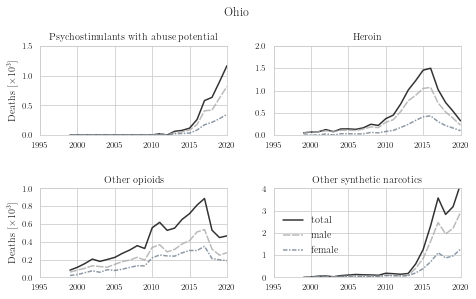

In [147]:
for state in ["Ohio"]:#[x for x in us_state_to_abbrev.keys()]:

    y_arr = [str(x) for x in np.arange(1999,2021)]

    death_arr_T43_6 = []
    death_arr_T43_6_male = []
    death_arr_T43_6_female = []

    death_arr_T40_1 = []
    death_arr_T40_1_male = []
    death_arr_T40_1_female = []

    death_arr_T40_2 = []
    death_arr_T40_2_male = []
    death_arr_T40_2_female = []

    death_arr_T40_4 = []
    death_arr_T40_4_male = []
    death_arr_T40_4_female = []

    for y in y_arr:

        death_arr_T43_6_male.append(extract_data("data/Multiple Cause of Death, 1999-2020_T43_6.txt",state,float(y),"Male"))
        death_arr_T43_6_female.append(extract_data("data/Multiple Cause of Death, 1999-2020_T43_6.txt",state,float(y),"Female"))
        death_arr_T43_6.append(death_arr_T43_6_female[-1]+death_arr_T43_6_male[-1])

        death_arr_T40_1_male.append(extract_data("data/Multiple Cause of Death, 1999-2020_T40_1.txt",state,float(y),"Male"))
        death_arr_T40_1_female.append(extract_data("data/Multiple Cause of Death, 1999-2020_T40_1.txt",state,float(y),"Female"))
        death_arr_T40_1.append(death_arr_T40_1_female[-1]+death_arr_T40_1_male[-1])

        death_arr_T40_2_male.append(extract_data("data/Multiple Cause of Death, 1999-2020_T40_2.txt",state,float(y),"Male"))
        death_arr_T40_2_female.append(extract_data("data/Multiple Cause of Death, 1999-2020_T40_2.txt",state,float(y),"Female"))
        death_arr_T40_2.append(death_arr_T40_2_female[-1]+death_arr_T40_2_male[-1])

        death_arr_T40_4_male.append(extract_data("data/Multiple Cause of Death, 1999-2020_T40_4.txt",state,float(y),"Male"))
        death_arr_T40_4_female.append(extract_data("data/Multiple Cause of Death, 1999-2020_T40_4.txt",state,float(y),"Female"))
        death_arr_T40_4.append(death_arr_T40_4_female[-1]+death_arr_T40_4_male[-1])

    death_arr_T43_6 = np.array(death_arr_T43_6)
    death_arr_T43_6_male = np.array(death_arr_T43_6_male)
    death_arr_T43_6_female = np.array(death_arr_T43_6_female)

    death_arr_T40_1 = np.array(death_arr_T40_1)
    death_arr_T40_1_male = np.array(death_arr_T40_1_male)
    death_arr_T40_1_female = np.array(death_arr_T40_1_female)

    death_arr_T40_2 = np.array(death_arr_T40_2)
    death_arr_T40_2_male = np.array(death_arr_T40_2_male)
    death_arr_T40_2_female = np.array(death_arr_T40_2_female)

    death_arr_T40_4 = np.array(death_arr_T40_4)
    death_arr_T40_4_male = np.array(death_arr_T40_4_male)
    death_arr_T40_4_female = np.array(death_arr_T40_4_female)

    div = 1e3
    y_arr_float = [float(y) for y in y_arr]

    fig, ax = plt.subplots(ncols=2,nrows=2)

    fig.suptitle("%s"%state)

    ax[0,0].set_title(r"Psychostimulants with abuse potential",fontsize=10)
    ax[0,0].plot(y_arr_float, death_arr_T43_6/div,color="k",alpha=0.8)
    ax[0,0].plot(y_arr_float, death_arr_T43_6_male/div,color="DarkGrey",alpha=0.8,ls=(0, (5, 1)))
    ax[0,0].plot(y_arr_float, death_arr_T43_6_female/div,color="SlateGrey",alpha=0.8,ls=(0, (3, 1, 1, 1)))
    ax[0,0].set_xlim(1995,2020)
    ax[0,0].set_ylim(0,1.5)#max(0.2,np.ceil(2*max(death_arr_T43_6)/div)/2))
    ax[0,0].set_ylabel(r"Deaths [$\times 10^3$]")

    ax[0,1].set_title(r"Heroin",fontsize=10)
    ax[0,1].plot(y_arr_float, death_arr_T40_1/div,color="k",alpha=0.8)
    ax[0,1].plot(y_arr_float, death_arr_T40_1_male/div,color="DarkGrey",alpha=0.8,ls=(0, (5, 1)))
    ax[0,1].plot(y_arr_float, death_arr_T40_1_female/div,color="SlateGrey",alpha=0.8,ls=(0, (3, 1, 1, 1)))
    ax[0,1].set_xlim(1995,2020)
    ax[0,1].set_ylim(0,2)#max(0.2,np.ceil(2*max(death_arr_T40_1)/div)/2))

    ax[1,0].set_title(r"Other opioids",fontsize=10)
    ax[1,0].plot(y_arr_float, death_arr_T40_2/div,color="k",alpha=0.8)
    ax[1,0].plot(y_arr_float, death_arr_T40_2_male/div,color="DarkGrey",alpha=0.8,ls=(0, (5, 1)))
    ax[1,0].plot(y_arr_float, death_arr_T40_2_female/div,color="SlateGrey",alpha=0.8,ls=(0, (3, 1, 1, 1)))
    ax[1,0].set_xlim(1995,2020)
    ax[1,0].set_ylim(0,1)#max(0.2,np.ceil(2*max(death_arr_T40_2)/div)/2))
    ax[1,0].set_ylabel(r"Deaths [$\times 10^3$]")

    ax[1,1].set_title(r"Other synthetic narcotics",fontsize=10)
    ax[1,1].plot(y_arr_float, death_arr_T40_4/div,color="k",alpha=0.8,label=r"total")
    ax[1,1].plot(y_arr_float, death_arr_T40_4_male/div,color="DarkGrey",alpha=0.8,ls=(0, (5, 1)),label=r"male")
    ax[1,1].plot(y_arr_float, death_arr_T40_4_female/div,color="SlateGrey",alpha=0.8,ls=(0, (3, 1, 1, 1)),label=r"female")
    ax[1,1].set_xlim(1995,2020)
    ax[1,1].set_ylim(0,4)#max(0.2,np.ceil(2*max(death_arr_T40_4)/div)/2))
    ax[1,1].legend(loc=(0.03,0.2),frameon=False)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.6,wspace=0.25)

    plt.savefig("drug_use_evolution/%s_multipanel.svg"%state,dpi=300)
    plt.show()

Now, we compare the crude rate ratios across different states.

In [169]:
#sns.set_style("white")
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 12,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, fig_height]
rcParams.update({'figure.figsize': fig_size})

In [170]:
def dict_except(dic,key):
    try:
        return dic[key]
    except:
        return np.nan

In [171]:
def dict_except_2(dic,key):
    try:
        return dic[key]
    except:
        return -1

In [172]:
def dict_except_3(dic,key):
    try:
        return dic[key]
    except:
        return 0

In [194]:
def state_deaths_plot_evolution(ylim=50):
    
    years = np.arange(1999,2021)
    y_arr = [str(x) for x in years]

    deaths_arr_male = []
    deaths_arr_female = []
    deaths_arr_tot_male = []
    deaths_arr_tot_female = []
    deaths_arr = []
    deaths_arr_tot = []
    
    df_total = pd.read_csv("data/Multiple Cause of Death, 1999-2020_total_evolution.txt",delimiter="\t")
    total_female = df_total[df_total["Gender Code"] == "F"]["Deaths"].dropna().to_numpy()
    total_male = df_total[df_total["Gender Code"] == "M"]["Deaths"].dropna().to_numpy()
        
    states_list_selection = np.array(['CT','IL','MA','OR','OK','WA'])
    
    for y in y_arr:
        df = pd.read_csv("data/Multiple Cause of Death, 1999-2020_T40_T43_6.txt",delimiter="\t")
        df_male = df[df["Gender"]=="Male"]
        df_male = df_male[df_male["Year"]==float(y)]
        df_male=df_male.replace("Unreliable",np.nan)
        df_male = df_male[["State","State Code","Deaths","Crude Rate"]].dropna()
        df_male[["Deaths","Crude Rate"]] = df_male[["Deaths","Crude Rate"]].apply(pd.to_numeric)
        state_codes_male = pd.Series(df_male["State"]).map(us_state_to_abbrev).to_numpy()
                
        df_female = df[df["Gender"]=="Female"]
        df_female = df_female[df_female["Year"]==float(y)]
        df_female = df_female.replace("Unreliable",np.nan)
        df_female = df_female[["State","State Code","Deaths","Crude Rate"]].dropna()
        df_female[["Deaths","Crude Rate"]] = df_female[["Deaths","Crude Rate"]].apply(pd.to_numeric)
        state_codes_female = pd.Series(df_female["State"]).map(us_state_to_abbrev).to_numpy()

        deaths_arr_male.append(df_male["Crude Rate"].to_numpy())
        deaths_arr_female.append(df_female["Crude Rate"].to_numpy())
        
        deaths_arr_tot_male.append(df_male["Deaths"].to_numpy())
        deaths_arr_tot_female.append(df_female["Deaths"].to_numpy())
        
        deaths_dict_male = dict(zip(state_codes_male,deaths_arr_male[-1]))
        deaths_dict_female = dict(zip(state_codes_female,deaths_arr_female[-1]))

        deaths_dict_tot_male = dict(zip(state_codes_male,deaths_arr_tot_male[-1]))
        deaths_dict_tot_female = dict(zip(state_codes_female,deaths_arr_tot_female[-1]))

        deaths_arr.append(np.array([dict_except_2(deaths_dict_male,key)/dict_except_2(deaths_dict_female,key) for key in states_list_selection]))
        deaths_arr_tot.append(np.array([dict_except_3(deaths_dict_tot_male,key)+dict_except_3(deaths_dict_tot_female,key) for key in states_list_selection]))

    fig, ax = plt.subplots(ncols=2)
    ax[1].plot(years,total_male/total_female,color="k",alpha=0.8,linewidth=1.5)
    
    for state in states_list_selection:
        ax[0].plot(years,np.array([deaths_arr_tot[i][states_list_selection == state][0] for i in range(len(y_arr))])/1e3,label=state,ls="-",linewidth=1)
        ax[1].plot(years,[deaths_arr[i][states_list_selection == state][0] for i in range(len(y_arr))],label=state,ls="-",linewidth=1)
   
    ax[0].text(2000+20*0.03,0.88*4,r"(a)")
    ax[1].text(2000+20*0.03,0.88*5,r"(b)")
    ax[0].set_xlim(2000,2020)
    ax[1].set_xlim(2000,2020)
    ax[0].set_xticks(np.arange(2000,2022)[::4])
    ax[1].set_xticks(np.arange(2000,2022)[::4])
    ax[1].set_ylim(0,5)
    ax[0].set_ylim(0,4)
    #plt.yscale("log")
    ax[0].set_ylabel(r"Deaths $[\times 10^3]$")
    ax[1].set_ylabel(r"Crude rate ratio")
    ax[0].legend(loc=(0.19,0.63),ncol=2,fontsize=8,frameon=False)
    plt.tight_layout()
    plt.savefig("death_ratio_evolution.png",dpi=300)
    plt.show()

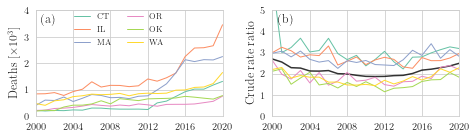

In [195]:
sns.set_palette(sns.color_palette("Set2"))
state_deaths_plot_evolution(ylim=40)

Next, we study the correlation between the crude rate ratio and increase in deaths between 2012 and 2020.

In [261]:
#sns.set_style("white")
# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 12,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, 2.5*fig_height]
rcParams.update({'figure.figsize': fig_size})

In [239]:
from scipy import stats

In [240]:
def color_state(abbr):
     
    state = us_abbrev_to_state[abbr]
    
    # northeast
    if state in [
    "Maine",
    "Massachusetts",
    "Rhode Island",
    "Connecticut",
    "New Hampshire",
    "Vermont",
    "New York",
    "Pennsylvania",
    "New Jersey",
    "Delaware",
    "Maryland"]:
    
        return sns.color_palette("Set2")[0]
    
    # southeast
    elif state in [
    "West Virginia",
    "Virginia",
    "Kentucky",
    "Tennessee",
    "North Carolina",
    "South Carolina",
    "Georgia",
    "Alabama",
    "Mississippi",
    "Arkansas",
    "Louisiana",
    "Florida"]:
    
        return sns.color_palette("Set2")[1]
    
    # midwest
    elif state in [
    "Ohio",
    "Indiana",
    "Michigan",
    "Illinois",
    "Missouri",
    "Wisconsin",
    "Minnesota",
    "Iowa",
    "Kansas",
    "Nebraska",
    "South Dakota",
    "North Dakota"]:
    
        return sns.color_palette("Set2")[2]
    
    # southwest
    elif state in [
    "Texas",
    "Oklahoma",
    "New Mexico",
    "Arizona"]:
    
        return sns.color_palette("Set2")[3]
    
    # west
    elif state in [
    "Colorado",
    "Wyoming",
    "Montana",
    "Idaho",
    "Washington",
    "Oregon",
    "Utah",
    "Nevada",
    "California",
    "Alaska",
    "Hawaii"]:
    
        return sns.color_palette("Set2")[4]    

In [290]:
def state_deaths_rate_corr_plot(ylim=50):
    
    years = np.arange(1999,2021)
    y_arr = [str(x) for x in years]

    deaths_arr_male = []
    deaths_arr_female = []
    deaths_arr_tot_male = []
    deaths_arr_tot_female = []
    deaths_arr = []
    deaths_arr_tot = []
    
    population_female = []
    population_male = []
    
    df_total = pd.read_csv("data/Multiple Cause of Death, 1999-2020_total_evolution.txt",delimiter="\t")
    total_female = df_total[df_total["Gender Code"] == "F"]["Deaths"].dropna().to_numpy()
    total_male = df_total[df_total["Gender Code"] == "M"]["Deaths"].dropna().to_numpy()
    
    states_list_selection = states_list
    
    for y in y_arr:
        df = pd.read_csv("data/Multiple Cause of Death, 1999-2020_T40_T43_6.txt",delimiter="\t")
        df_male = df[df["Gender"]=="Male"]
        df_male = df_male[df_male["Year"]==float(y)]
        df_male=df_male.replace("Unreliable",np.nan)
        df_male = df_male[["State","State Code","Deaths","Crude Rate","Population"]].dropna()
        df_male[["Deaths","Crude Rate"]] = df_male[["Deaths","Crude Rate"]].apply(pd.to_numeric)
        state_codes_male = pd.Series(df_male["State"]).map(us_state_to_abbrev).to_numpy()
                
        df_female = df[df["Gender"]=="Female"]
        df_female = df_female[df_female["Year"]==float(y)]
        df_female = df_female.replace("Unreliable",np.nan)
        df_female = df_female[["State","State Code","Deaths","Crude Rate","Population"]].dropna()
        df_female[["Deaths","Crude Rate"]] = df_female[["Deaths","Crude Rate"]].apply(pd.to_numeric)
        state_codes_female = pd.Series(df_female["State"]).map(us_state_to_abbrev).to_numpy()
        
        print(len(df_male["Population"].to_numpy()),len(df_male["Crude Rate"].to_numpy()),len(df_male["Deaths"].to_numpy()))
        
        deaths_arr_male.append(df_male["Crude Rate"].to_numpy())
        deaths_arr_female.append(df_female["Crude Rate"].to_numpy())
        
        deaths_arr_tot_male.append(df_male["Deaths"].to_numpy())
        deaths_arr_tot_female.append(df_female["Deaths"].to_numpy())
        
        deaths_dict_male = dict(zip(state_codes_male,deaths_arr_male[-1]))
        deaths_dict_female = dict(zip(state_codes_female,deaths_arr_female[-1]))

        deaths_dict_tot_male = dict(zip(state_codes_male,deaths_arr_tot_male[-1]))
        deaths_dict_tot_female = dict(zip(state_codes_female,deaths_arr_tot_female[-1]))

        deaths_arr.append(np.array([dict_except_2(deaths_dict_male,key)/dict_except_2(deaths_dict_female,key) for key in states_list_selection]))
        deaths_arr_tot.append(np.array([dict_except_3(deaths_dict_tot_male,key)+dict_except_3(deaths_dict_tot_female,key) for key in states_list_selection]))

        population_male_dict = dict(zip(state_codes_male,df_male["Population"].to_numpy()))
        population_female_dict = dict(zip(state_codes_female,df_female["Population"].to_numpy()))

        population_male.append(np.array([dict_except_2(population_male_dict,key) for key in states_list_selection]))
        population_female.append(np.array([dict_except_2(population_female_dict,key) for key in states_list_selection]))
        
    fig, ax = plt.subplots()
    
    x_vals = []
    y_vals = []
    
    for state in states_list_selection:
        try:
            mean_crude_rate_ratio = np.mean([deaths_arr[i][states_list_selection == state][0] for i in range(len(y_arr))][-9:])
            max_slope = (np.array([deaths_arr_tot[i][states_list_selection == state][0] for i in range(len(y_arr))]))[-1]-\
            (np.array([deaths_arr_tot[i][states_list_selection == state][0] for i in range(len(y_arr))]))[-9]
            #max_slope /= (np.array([deaths_arr_tot[i][states_list_selection == state][0] for i in range(len(y_arr))]))[-1]+\
            #(np.array([deaths_arr_tot[i][states_list_selection == state][0] for i in range(len(y_arr))]))[-8]
                        
            max_slope /= (np.array([population_male[i][states_list_selection == state][0] for i in range(len(y_arr))]))[-1]+\
            (np.array([population_female[i][states_list_selection == state][0] for i in range(len(y_arr))]))[-9]
            max_slope *= 1e5
            
            if population_female[-1][states_list_selection == state][0] > 0 and population_male[-1][states_list_selection == state][0]:
                if population_female[-8][states_list_selection == state][0] > 0 and population_male[-9][states_list_selection == state][0]:
                    if mean_crude_rate_ratio > 0:
                        ax.plot(mean_crude_rate_ratio,max_slope,'o',color=color_state(state),markersize=20,alpha=0.3,zorder=10)
                        #ax.text(mean_crude_rate_ratio-0.04,max_slope-0.3,r'%s'%state,color="k",fontsize=9,zorder=10)

                        ax.annotate(r'%s'%state,  xy=(mean_crude_rate_ratio,max_slope), color='k',fontsize=9, weight='heavy',horizontalalignment='center',verticalalignment='center')

                        x_vals.append(mean_crude_rate_ratio)
                        y_vals.append(max_slope)
            
        except:
            pass
    
    x_vals = np.array(x_vals)
    y_vals = np.array(y_vals)
        
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_vals,y_vals)

    delta_slope = 1.96*std_err    
    
    xx = np.linspace(0.5,3)
    
    ax.fill_between(xx, (slope+delta_slope)*xx+intercept,(slope-delta_slope)*xx+intercept,facecolor='LightGrey',edgecolor='Grey',alpha=0.6)
    ax.plot(xx, slope*xx+intercept, 'k', alpha=0.8,zorder=1)
    
    axin1 = ax.inset_axes([0.12,0.65, 0.3, 0.3])
    
    #print("slope, intercept: ", slope,intercept)
    
    residuals = [y_vals[i]-slope*x_vals[i]-intercept for i in range(len(y_vals))]
    
    stats.probplot(residuals,dist="norm",plot=axin1)
    
    axin1.get_lines()[0].set_marker('.')
    axin1.get_lines()[0].set_color('tab:blue')
    axin1.get_lines()[1].set_color('k')
    axin1.get_lines()[0].set_alpha(0.6)
    axin1.get_lines()[1].set_alpha(0.8)

    #ax.text(0.5+2.5*0.03,0.88*60-20,r"(a)")
    #ax[1].text(-2+4*0.03,0.88*40-20,r"(b)")
    
    ax.set_xlim(0.5,3)
    ax.set_ylim(-10,60)
    ax.set_xlabel(r"Mean crude rate ratio")
    ax.set_ylabel(r"Increase in deaths")
    
    axin1.set_xlabel(r"Theoretical quantiles")
    axin1.set_ylabel(r"Ordered residuals")
    axin1.set_title("")
    axin1.set_xlim(-2,2)
    axin1.set_ylim(-20,20)

    plt.tight_layout()
    plt.savefig("deaths_crude_rate_corr.png",dpi=300)
    plt.show()

42 42 42
44 44 44
46 46 46
46 46 46
46 46 46
47 47 47
47 47 47
48 48 48
48 48 48
50 50 50
49 49 49
50 50 50
50 50 50
49 49 49
50 50 50
50 50 50
51 51 51
51 51 51
51 51 51
51 51 51
51 51 51
51 51 51


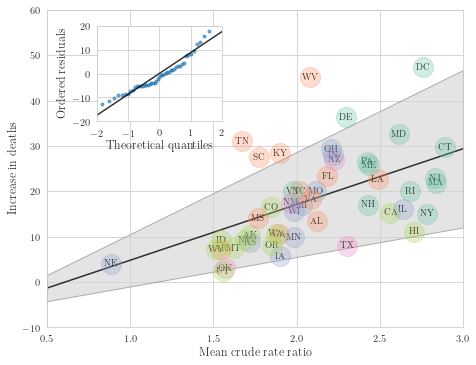

In [291]:
state_deaths_rate_corr_plot(ylim=40)